In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/energy-data/Energy Data.csv


# Forecasting Renewable Energy Production: A Data-Driven Approach

## Problem Statement
Renewable energy is the backbone of our sustainable future—but it comes with a challenge: the sun doesn’t always shine, and the wind doesn’t always blow. For grid operators, this variability makes planning and balancing supply and demand incredibly tricky.

Imagine trying to predict how much electricity a solar farm will generate in the next hour or how wind turbines will perform tomorrow. Getting it wrong could mean wasted energy, financial losses, or even blackouts.

This project aims to predict solar (PV) and wind energy production using historical weather and production data. By doing this, we can help energy operators make smarter decisions, optimize storage, and keep the lights on—all while supporting the transition to cleaner energy.



Over the last two decades, renewable energy has moved from a niche experiment to a major player in the global energy landscape. But unlike coal or gas plants, solar panels and wind turbines can’t be turned on at will. Their output depends on nature itself.

This project uses historical production and weather data to build predictive models for PV and wind energy. We’ll explore patterns in the data, create features that capture daily and seasonal trends, and build machine learning models to forecast energy production.

By the end, this project doesn’t just produce numbers—it tells a story: how sunlight, wind, temperature, and time of day come together to power our homes and cities.

## Introduction
Over the last two decades, renewable energy has moved from a niche experiment to a major player in the global energy landscape. But unlike coal or gas plants, solar panels and wind turbines can’t be turned on at will. Their output depends on nature itself.

This project uses historical production and weather data to build predictive models for PV and wind energy. We’ll explore patterns in the data, create features that capture daily and seasonal trends, and build machine learning models to forecast energy production.

By the end, this project doesn’t just produce numbers—it tells a story: how sunlight, wind, temperature, and time of day come together to power our homes and cities.

## Data Source

We rely on high-resolution data from CAISO (California Independent System Operator) and NREL (National Renewable Energy Laboratory)—trusted sources in energy research.

The dataset includes:

Energy production: PV (solar) and wind output at 5-minute intervals.

Electric demand: How much electricity people are using at each time.

Weather data: Solar irradiance (DHI, DNI, GHI), wind speed, temperature, and humidity.

Time variables: Season, day of the week, and exact timestamps.

This isn’t just numbers in a table—it’s a living record of how nature and human demand interact with the energy grid. The granularity allows us to study minute-to-minute fluctuations, giving a realistic picture of renewable energy dynamics.

## Why This Matters

Helps grid operators anticipate production and avoid shortages.

Supports efficient use of energy storage, like batteries.

Demonstrates the power of data-driven decision-making in renewable energy.

In short, this project is where data meets real-world impact: turning raw numbers into actionable insights for a greener, more reliable energy system.

## Exploratory Data Analysis (EDA): Understanding the Pulse of Renewable Energy

Before we start predicting the future, we need to understand the past. The EDA phase is like putting on your detective hat: we’ll explore the data to uncover patterns, trends, and surprises in PV and wind energy production.

## 1. Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")



## 2.  Load the Data

In [44]:
# Load CSV file
df = pd.read_csv("/kaggle/input/energy-data/Energy Data.csv")

# Check first few rows
print(df.head())

# Check columns
print(df.columns)


   Unnamed: 0               Time  Season  Day_of_the_week  DHI  DNI  GHI  \
0           0  2019-01-01-T00:00       1                1  0.0  0.0  0.0   
1           1  2019-01-01-T00:05       1                1  0.0  0.0  0.0   
2           2  2019-01-01-T00:10       1                1  0.0  0.0  0.0   
3           3  2019-01-01-T00:15       1                1  0.0  0.0  0.0   
4           4  2019-01-01-T00:20       1                1  0.0  0.0  0.0   

   Wind_speed  Humidity  Temperature  PV_production  Wind_production  \
0        2.88    56.036         1.82              0             2810   
1        2.88    56.036         1.82              0             2862   
2        2.88    56.194         1.78              0             2916   
3        2.88    56.344         1.74              0             2920   
4        2.84    56.440         1.72              0             2902   

   Electric_demand  
0            22216  
1            22106  
2            22130  
3            22040  
4    

In [45]:
# check the columns
df.columns

Index(['Unnamed: 0', 'Time', 'Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI',
       'Wind_speed', 'Humidity', 'Temperature', 'PV_production',
       'Wind_production', 'Electric_demand'],
      dtype='object')

In [46]:
# check the datatype and other information per colums
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315648 entries, 0 to 315647
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       315648 non-null  int64  
 1   Time             315648 non-null  object 
 2   Season           315648 non-null  int64  
 3   Day_of_the_week  315648 non-null  int64  
 4   DHI              315648 non-null  float64
 5   DNI              315648 non-null  float64
 6   GHI              315648 non-null  float64
 7   Wind_speed       315648 non-null  float64
 8   Humidity         315648 non-null  float64
 9   Temperature      315648 non-null  float64
 10  PV_production    315648 non-null  int64  
 11  Wind_production  315648 non-null  int64  
 12  Electric_demand  315648 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 31.3+ MB


In [47]:
# check statistics summary
df.describe()

,Unnamed: 0,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production,Wind_production,Electric_demand
count,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000,315648.000000
mean,157823.500000,2.508212,2.998175,53.779907,288.058615,221.787985,2.545759,51.261462,17.472179,3555.139722,2019.642526,24833.695287
std,91119.873222,1.117189,1.997720,68.829995,336.057040,296.632914,1.042771,16.319826,7.701694,4371.602324,1300.285246,4859.658254
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.660000,11.572000,-0.540000,-145.000000,-2476.000000,14662.000000
25%,78911.750000,2.000000,1.000000,0.000000,0.000000,0.000000,1.760000,38.380000,11.200000,-34.000000,866.000000,21368.000000
50%,157823.500000,3.000000,3.000000,7.600000,38.000000,10.200000,2.340000,51.662000,16.700000,110.000000,1829.000000,23879.000000
75%,236735.250000,4.000000,5.000000,98.800000,601.600000,427.200000,3.160000,63.644000,22.800000,7952.000000,3053.000000,26814.000000
max,315647.000000,4.000000,6.000000,431.000000,999.800000,1058.200000,8.540000,88.688000,39.020000,13191.000000,5743.000000,47067.000000


In [48]:
# Check for missisng values
df.isna().sum()

Unnamed: 0         0
Time               0
Season             0
Day_of_the_week    0
DHI                0
DNI                0
GHI                0
Wind_speed         0
Humidity           0
Temperature        0
PV_production      0
Wind_production    0
Electric_demand    0
dtype: int64

In [49]:
#check the size of the data
df.size

4103424

## 3. Clean the Data

In [50]:
# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Set 'Time' as the index for time series analysis
df.set_index('Time', inplace=True)

# Verify
print(df.head())
print(type(df.index))


                     Unnamed: 0  Season  Day_of_the_week  DHI  DNI  GHI  \
Time                                                                      
2019-01-01 00:00:00           0       1                1  0.0  0.0  0.0   
2019-01-01 00:05:00           1       1                1  0.0  0.0  0.0   
2019-01-01 00:10:00           2       1                1  0.0  0.0  0.0   
2019-01-01 00:15:00           3       1                1  0.0  0.0  0.0   
2019-01-01 00:20:00           4       1                1  0.0  0.0  0.0   

                     Wind_speed  Humidity  Temperature  PV_production  \
Time                                                                    
2019-01-01 00:00:00        2.88    56.036         1.82              0   
2019-01-01 00:05:00        2.88    56.036         1.82              0   
2019-01-01 00:10:00        2.88    56.194         1.78              0   
2019-01-01 00:15:00        2.88    56.344         1.74              0   
2019-01-01 00:20:00        2.84    5

In [51]:
# Drop duplicates if they exist
df = df.loc[:, ~df.columns.duplicated()]

# Verify columns
print(df.columns)


Index(['Unnamed: 0', 'Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI',
       'Wind_speed', 'Humidity', 'Temperature', 'PV_production',
       'Wind_production', 'Electric_demand'],
      dtype='object')


In [52]:
# Check for duplicate columns
duplicate_columns = df.columns[df.columns.duplicated()].tolist()
print("Duplicate columns:", duplicate_columns)

# Drop duplicate columns if any
df = df.loc[:, ~df.columns.duplicated()]

# Verify columns after dropping duplicates
print("Columns after dropping duplicates:", df.columns.tolist())


Duplicate columns: []
Columns after dropping duplicates: ['Unnamed: 0', 'Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature', 'PV_production', 'Wind_production', 'Electric_demand']


In [53]:
duplicate_rows = df.duplicated().sum()
print("Duplicate rows:", duplicate_rows)

Duplicate rows: 0


In [54]:
df.duplicated()

Time
2019-01-01 00:00:00    False
2019-01-01 00:05:00    False
2019-01-01 00:10:00    False
2019-01-01 00:15:00    False
2019-01-01 00:20:00    False
                       ...  
2021-12-31 23:35:00    False
2021-12-31 23:40:00    False
2021-12-31 23:45:00    False
2021-12-31 23:50:00    False
2021-12-31 23:55:00    False
Length: 315648, dtype: bool

In [55]:
# Find duplicate indices
duplicate_times = df.index[df.index.duplicated()].unique()
print("Number of duplicated timestamps:", len(duplicate_times))
print("Sample duplicated timestamps:", duplicate_times[:5])


Number of duplicated timestamps: 0
Sample duplicated timestamps: DatetimeIndex([], dtype='datetime64[ns]', name='Time', freq=None)


## 4. Exploratory Data Analysis (EDA)

array([[<Axes: title={'center': 'PV_production'}>,
        <Axes: title={'center': 'Wind_production'}>],
       [<Axes: title={'center': 'Electric_demand'}>, <Axes: >]],
      dtype=object)

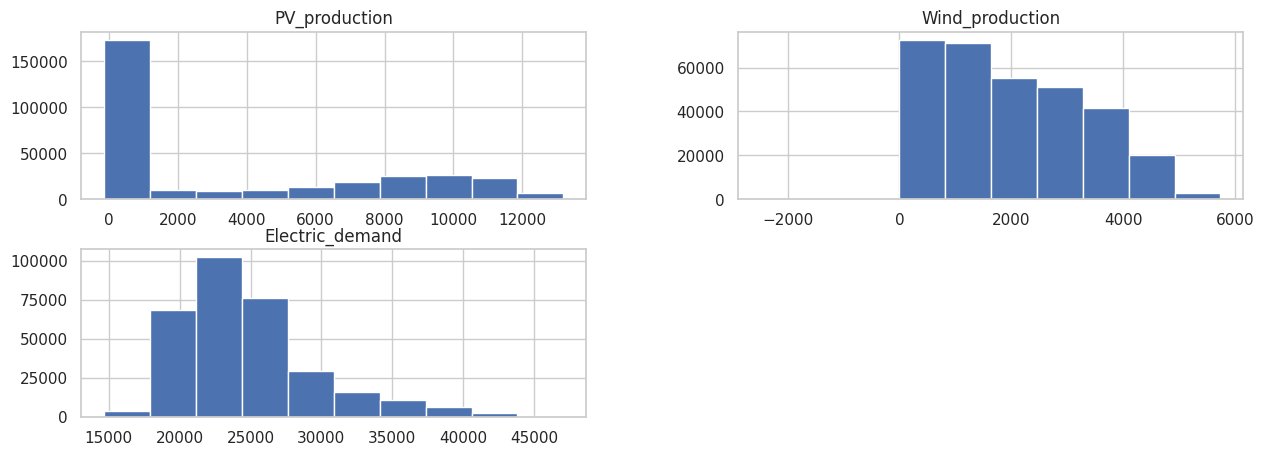

In [56]:
# Check data distribution
df[['PV_production','Wind_production','Electric_demand']].hist(figsize=(15,5))


<Axes: xlabel='Time'>

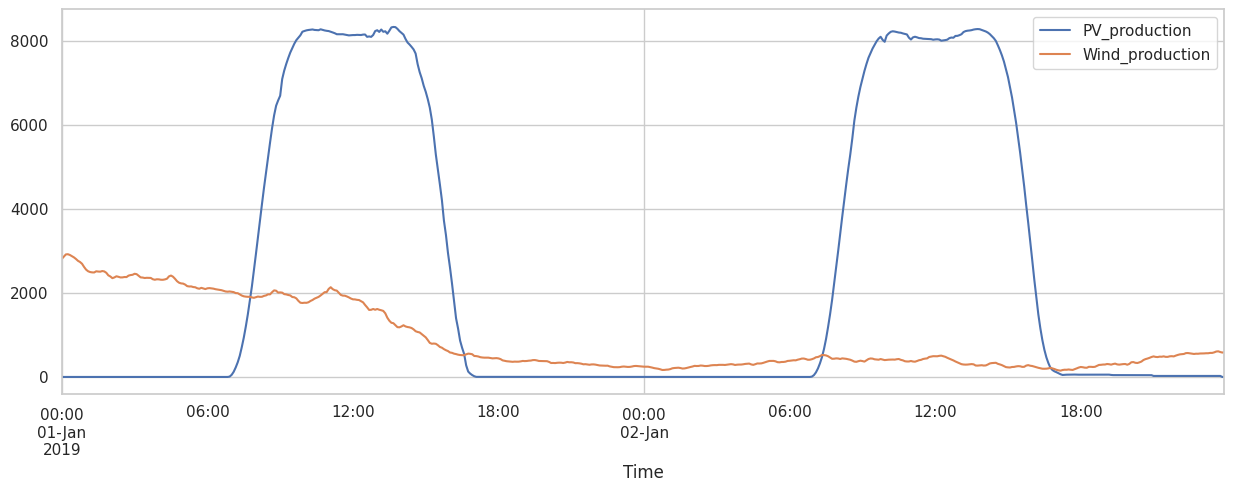

In [57]:
# Time Series Plotin
df[['PV_production','Wind_production']].iloc[:2*24*12].plot(figsize=(15,5))


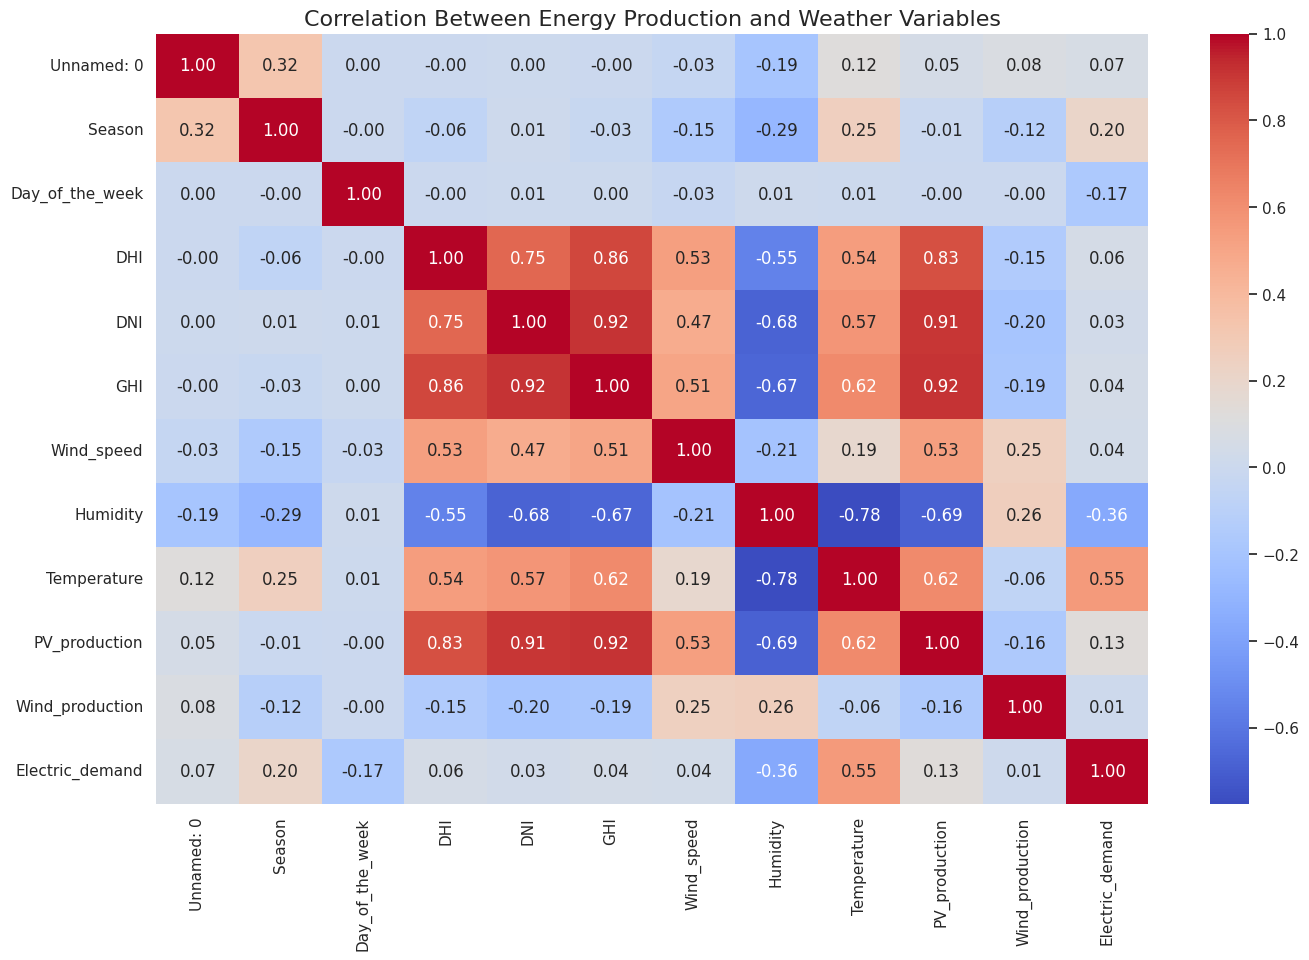

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))  # Increase figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Energy Production and Weather Variables", fontsize=16)
plt.show()


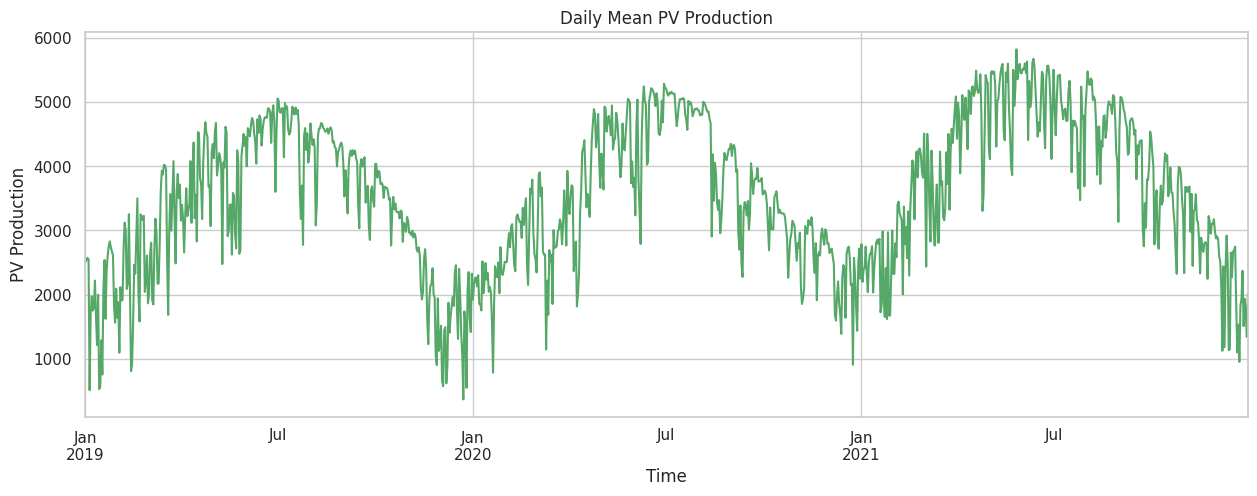

In [59]:
## 4.4.1 Daily PV production
daily_pv = df['PV_production'].resample('D').mean()
daily_pv.plot(figsize=(15,5), title="Daily Mean PV Production", color = 'g')
plt.ylabel("PV Production")
plt.show()

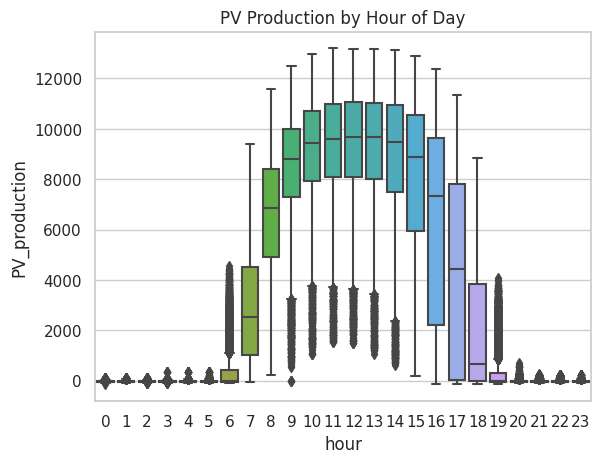

In [60]:
## 4.4.2 Hourly PV production
df['hour'] = df.index.hour
sns.boxplot(x='hour', y='PV_production', data=df)
plt.title("PV Production by Hour of Day")
plt.show()

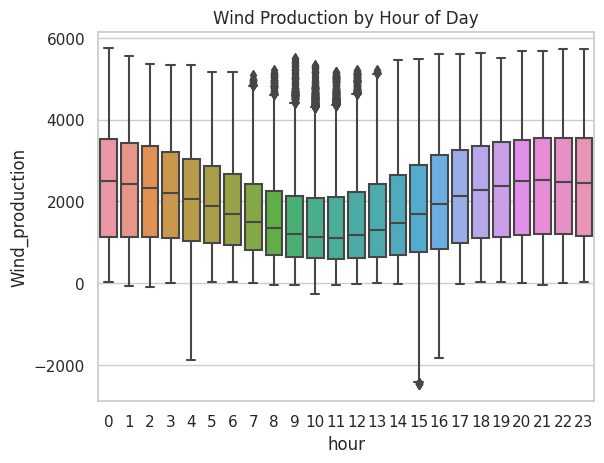

In [61]:
## 4.4.3 Wind production by hour
sns.boxplot(x='hour', y='Wind_production', data=df)
plt.title("Wind Production by Hour of Day")
plt.show()

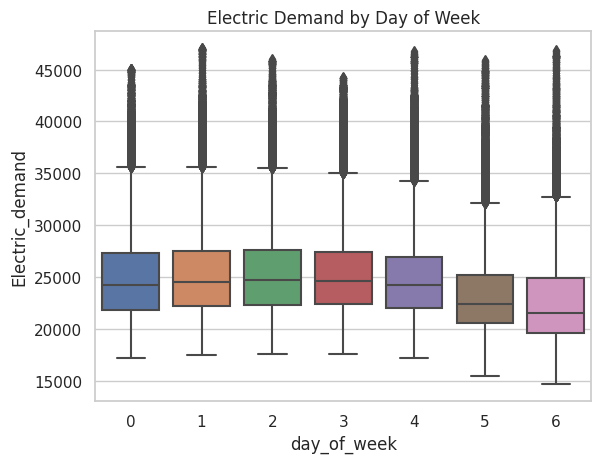

In [62]:
## 4.5 Weekly Patterns
df['day_of_week'] = df.index.dayofweek
sns.boxplot(x='day_of_week', y='Electric_demand', data=df)
plt.title("Electric Demand by Day of Week")
plt.show()

## 5. Key Takeaways from EDA

PV production is highly predictable using irradiance and temporal features.

Wind production is variable, mainly driven by wind speed.

Temporal features (hour, day, month, season) are crucial.

Dataset is clean and ready for feature engineering.

Daily and seasonal patterns are clear, supporting time series forecasting.

## 6. Feature Engineering

### 6.1 Create Time-Based Features

In [63]:
# Temporal Features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek
df['week_of_year'] = df.index.isocalendar().week.astype(int)
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)


### 6.2 Create Seasonal Feature

In [64]:
df['season'] = df['month']%12 // 3 + 1   # 1=Winter, 2=Spring, 3=Summer, 4=Fall


### 6.3 Lag Features (Key for Forecasting)

In [65]:
# Lags for PV Production
df['pv_lag_1'] = df['PV_production'].shift(1)
df['pv_lag_12'] = df['PV_production'].shift(12)   # 1 hour lag (5-min data → 12 steps)
df['pv_lag_36'] = df['PV_production'].shift(36)   # 3 hour lag

# Lags for Wind Production
df['wind_lag_1'] = df['Wind_production'].shift(1)
df['wind_lag_12'] = df['Wind_production'].shift(12)
df['wind_lag_36'] = df['Wind_production'].shift(36)

# Lags for Demand
df['demand_lag_1'] = df['Electric_demand'].shift(1)
df['demand_lag_12'] = df['Electric_demand'].shift(12)
df['demand_lag_36'] = df['Electric_demand'].shift(36)


## 6.4 Rolling Window Features (Trend Indicators)

In [66]:
# Rolling Means for Smooth Trends
df['pv_roll_1h'] = df['PV_production'].rolling(window=12).mean()
df['pv_roll_3h'] = df['PV_production'].rolling(window=36).mean()

df['wind_roll_1h'] = df['Wind_production'].rolling(window=12).mean()
df['wind_roll_3h'] = df['Wind_production'].rolling(window=36).mean()

df['demand_roll_1h'] = df['Electric_demand'].rolling(window=12).mean()
df['demand_roll_3h'] = df['Electric_demand'].rolling(window=36).mean()


### 6.5 Weather Interaction Features (Optional but Powerful)

In [67]:
df['temp_humidity_interaction'] = df['Temperature'] * df['Humidity']
df['wind_temp_interaction'] = df['Wind_speed'] * df['Temperature']
df['irradiance_sum'] = df['GHI'] + df['DHI'] + df['DNI']


### 6.6 Drop Rows Introduced by Lag/Rolling Features

In [68]:
df = df.dropna()


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,315612.0,157841.500000,91109.480917,36.000000,78938.750000,157841.500000,236744.250000,315647.000000
Season,315612.0,2.508384,1.117137,1.000000,2.000000,3.000000,4.000000,4.000000
Day_of_the_week,315612.0,2.998403,1.997720,0.000000,1.000000,3.000000,5.000000,6.000000
DHI,315612.0,53.786041,68.831524,0.000000,0.000000,7.600000,98.800000,431.000000
DNI,315612.0,288.091472,336.062122,0.000000,0.000000,38.100000,601.600000,999.800000
GHI,315612.0,221.813283,296.640373,0.000000,0.000000,10.200000,427.200000,1058.200000
Wind_speed,315612.0,2.545734,1.042828,0.660000,1.760000,2.340000,3.160000,8.540000
Humidity,315612.0,51.261016,16.320701,11.572000,38.378000,51.660000,63.646000,88.688000
Temperature,315612.0,17.474009,7.700226,-0.540000,11.220000,16.700000,22.800000,39.020000
PV_production,315612.0,3555.545236,4371.686737,-145.000000,-34.000000,110.000000,7953.000000,13191.000000


## 7. Train/Test Split + Baseline Modeling

## 7.2 Define Target Variables

In [70]:

target_pv = "PV_production"
target_wind = "Wind_production"

## 7.2 Select Features

In [71]:


feature_cols = df.columns.drop([target_pv, target_wind])

## 7.3 Create Train–Test Split (Time-Based)

Forecasting models must train on the past and predict the future.

Use last 20% of the data as test.

In [72]:


split_index = int(0.8 * len(df))

df_train = df.iloc[:split_index]
df_test  = df.iloc[split_index:]

## 7.4 Define X and y for PV

In [73]:

X_train_pv = df_train[feature_cols]
y_train_pv = df_train[target_pv]

X_test_pv = df_test[feature_cols]
y_test_pv = df_test[target_pv]

## 7.5 Train a Baseline Model (Random Forest Regressor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_pv = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model_pv.fit(X_train_pv, y_train_pv)


## 7.6 Make Predictions

In [83]:

pv_predictions = model_pv.predict(X_test_pv)

## 7.7 Evaluate the Model

We use common regression metrics:

MAE → Mean Absolute Error

RMSE → Root Mean Squared Error

R² → Coefficient of Determination



In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_pv = mean_absolute_error(y_test_pv, pv_predictions)
rmse_pv = np.sqrt(mean_squared_error(y_test_pv, pv_predictions))
r2_pv = r2_score(y_test_pv, pv_predictions)

print("PV FORECASTING PERFORMANCE")
print(f"MAE:  {mae_pv:.2f}")
print(f"RMSE: {rmse_pv:.2f}")
print(f"R²:   {r2_pv:.3f}")

PV FORECASTING PERFORMANCE
MAE:  39.97
RMSE: 79.77
R²:   1.000


## 7.8 Plot Actual vs Predicted PV Production

This is essential in your Kaggle notebook.

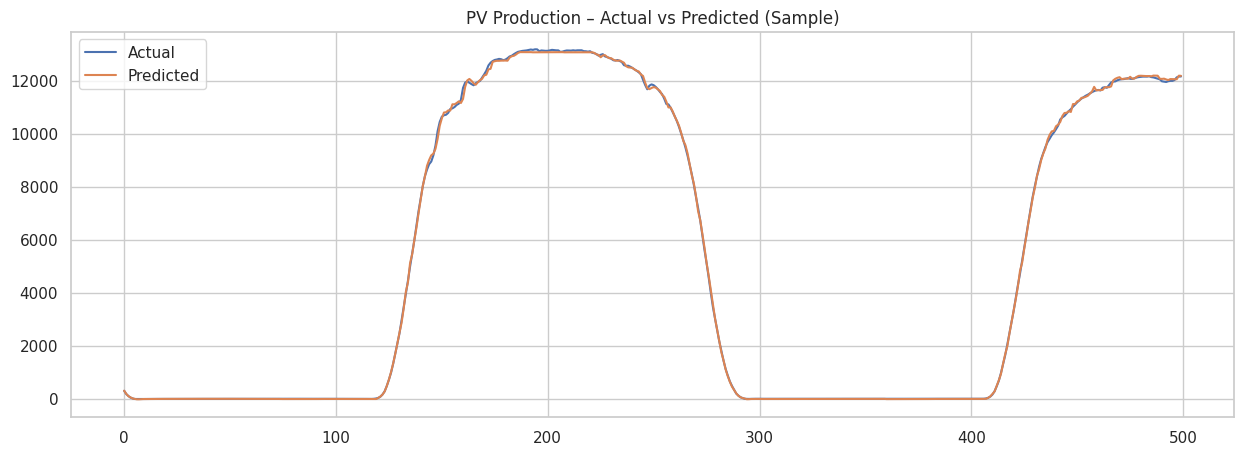

In [87]:


plt.figure(figsize=(15,5))
plt.plot(y_test_pv.values[:500], label="Actual")
plt.plot(pv_predictions[:500], label="Predicted")
plt.title("PV Production – Actual vs Predicted (Sample)")
plt.legend()
plt.show()

## 7.9 Repeat Same Steps for Wind Production

Exactly the same approach, but replacing PV target with wind.

In [89]:


X_train_wind = df_train[feature_cols]
y_train_wind = df_train[target_wind]

X_test_wind = df_test[feature_cols]
y_test_wind = df_test[target_wind]

In [99]:
model_wind = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
model_wind.fit(X_train_wind, y_train_wind)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [98]:
wind_predictions = model_wind.predict(X_test_wind)

mae_wind = mean_absolute_error(y_test_wind, wind_predictions)
rmse_wind = np.sqrt(mean_squared_error(y_test_wind, wind_predictions))
r2_wind = r2_score(y_test_wind, wind_predictions)

print("WIND FORECASTING PERFORMANCE")
print(f"MAE:  {mae_wind:.2f}")
print(f"RMSE: {rmse_wind:.2f}")
print(f"R²:   {r2_wind:.3f}")


WIND FORECASTING PERFORMANCE
MAE:  23.69
RMSE: 49.07
R²:   0.999
